In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import logging

module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from pvi.models import LinearRegressionModel
from pvi.clients import Client
from pvi.distributions import MultivariateGaussianDistribution
from pvi.distributions import MultivariateGaussianFactor

import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm

from torch import nn

%matplotlib inline
torch.set_default_dtype(torch.float64)

# Set up data and helper functions

In [3]:
x = np.linspace(-1, 1, 10)
y = 2 * x + 3 * np.abs(x) * np.random.rand(len(x))

x = torch.tensor(x).unsqueeze(1)
y = torch.tensor(y).unsqueeze(1)

In [4]:
def plot_data(x, y):
    plt.figure()
    plt.grid(visible=True)
    plt.scatter(x, y)
    plt.show()

# grid(b=...) was deprecated and has since been replaced with grid(visible=...), all change in this box
# worked since changing and not throwing an error message since

def plot_results(x, y, model, q):
    pp = model(x, q)
    mean = pp.mean.detach()
    std = pp.variance.detach() ** 0.5
    
    w_samples = q.distribution.sample((20,))
    
    plt.figure()
    plt.grid(visible=True)
    
    for w in w_samples:
        plt.plot(x, x * w[0] + w[1], color='k', alpha=.1)
        
    plt.plot(x.squeeze(-1), mean)
    plt.fill_between(x.squeeze(-1), mean-1.96*std, mean+1.96*std, alpha=.25)
    plt.scatter(x, y)
    plt.show()
    
def plot_training(training_array):
    x_vals = np.arange(1, len(training_array)+1)
    plt.figure()
    plt.grid(visible=True)
    plt.plot(x_vals, training_array)
    plt.ylabel('ELBO Loss')
    plt.xlabel('Step')
    plt.show()
    
data = {
    "x": x,
    "y": y,
}

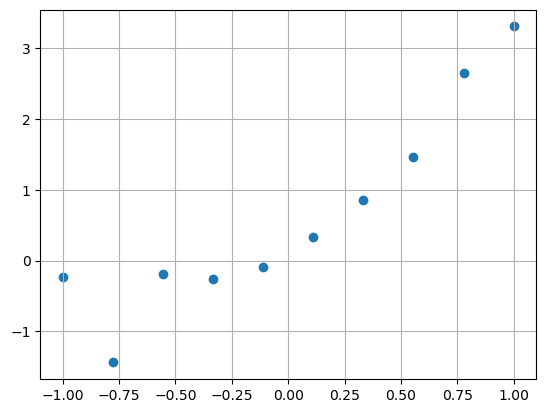

In [5]:
plot_data(x, y)

# Construct linear regression model

In [30]:
model_config = {
    "D": 1,
}

model_hyperparameters = {
    "outputsigma": torch.tensor(.25),
}

model = LinearRegressionModel(train_sigma=False, config=model_config, hyperparameters=model_hyperparameters)

q = MultivariateGaussianDistribution(
    nat_params={
        "np1": torch.zeros(model_config["D"]+1), #Two dimensional tensor [0., 0.] == mean
        "np2": -0.5 * torch.eye(model_config["D"]+1) #Two-by-two dimensional tensor, Identity matrix_2 times -0.5 == variance
    }
)

/Users/terjemildner/Desktop/PVI-main/pvi/models/linear_regression.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(self.hyperparameters["outputsigma"]).log())


In [31]:
print(q.nat_params["np1"].unsqueeze(-1))

tensor([[0.],
        [0.]])


In [32]:
model.forward(x, q)

================= Round =================
For torch.linalg.solve args: 
Arg 2: q.nat_params['np1'].unsqueeze(-1):  tensor([[0.],
        [0.]])
Arg 1: prec:  tensor([[1., 0.],
        [0., 1.]])
Solved equation mu_1:  tensor([[0.],
        [0.]])
Getting the first arguemnet of mu_1 through mu_1[0]: tensor([0.])
Squeeze mu_2 for it's last dimension? mu_2.squeeze(-1):  tensor(0.)
x:  tensor([[-1.0000],
        [-0.7778],
        [-0.5556],
        [-0.3333],
        [-0.1111],
        [ 0.1111],
        [ 0.3333],
        [ 0.5556],
        [ 0.7778],
        [ 1.0000]])
x_ is the following:  tensor([[-1.0000,  1.0000],
        [-0.7778,  1.0000],
        [-0.5556,  1.0000],
        [-0.3333,  1.0000],
        [-0.1111,  1.0000],
        [ 0.1111,  1.0000],
        [ 0.3333,  1.0000],
        [ 0.5556,  1.0000],
        [ 0.7778,  1.0000],
        [ 1.0000,  1.0000]])
Do matrix multiplication between x_ and mu_1: x_.matmul(mu_1)
The results of the matmul operator ppmu:  tensor([[0.],
   

ValueError: Expected parameter scale (Tensor of shape (10,)) of distribution Normal(loc: torch.Size([10]), scale: torch.Size([10])) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
tensor([1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
        0.0000])

In [13]:
plot_results(x, y, model, q)

tensor([[0.],
        [0.]])
tensor([[1., 0.],
        [0., 1.]])
tensor([[0.],
        [0.]])
tensor([0.])
tensor(0.)
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
        0.0000])
ppvar: torch.Size([10])


ValueError: Expected parameter scale (Tensor of shape (10, 10)) of distribution Normal(loc: torch.Size([10, 10]), scale: torch.Size([10, 10])) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
tensor([[1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000],
        [1.4142, 1.3333, 1.2472, 1.1547, 1.0541, 0.9428, 0.8165, 0.6667, 0.4714,
         0.0000]])

# Fit data

In [8]:
t = MultivariateGaussianFactor(
    nat_params={
        "np1": torch.zeros(model.config["D"]+1),
        "np2": 0. * torch.eye(model.config["D"]+1),
    }
)

In [9]:
client_config = {
    "epochs": 1000,
    "optimiser": "Adam",
    "optimiser_params": {"lr": 1e-2},
}


# Construct client.
client = Client(data=data, model=model, t=t, config=client_config)

## Without optimising model (hyper-)parameters

In [10]:
q_new, t_new = client.update_q(q)

In [11]:
type(q_new) == client.model.conjugate_family

True

In [12]:
plot_results(x, y, client.model, q_new)

tensor([[156.3358],
        [ 59.2511]])
tensor([[ 66.1852,   0.0000],
        [  0.0000, 161.0000]])
tensor([[2.3621],
        [0.3680]])
tensor([2.3621])
tensor(2.3621)
tensor([[-1.9941],
        [-1.4692],
        [-0.9443],
        [-0.4193],
        [ 0.1056],
        [ 0.6305],
        [ 1.1554],
        [ 1.6803],
        [ 2.2052],
        [ 2.7301]])
tensor([0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
           nan])


ValueError: Expected parameter scale (Tensor of shape (10, 10)) of distribution Normal(loc: torch.Size([10, 10]), scale: torch.Size([10, 10])) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
tensor([[0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan],
        [0.1460, 0.1340, 0.1209, 0.1061, 0.0888, 0.0673, 0.0343,    nan,    nan,
            nan]])